In [21]:
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize, pos_tag
from sklearn import model_selection, naive_bayes
from sklearn.ensemble import RandomForestClassifier 

In [3]:
data = pd.read_csv('tweets.csv')
data

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,positive
27479,ed167662a5,But it was worth it ****.,positive


## Preprocess

In [4]:
#check the data for cleaning
for i in range(0,1000):
    print(data['text'][i])
    print('//')

 I`d have responded, if I were going
//
 Sooo SAD I will miss you here in San Diego!!!
//
my boss is bullying me...
//
 what interview! leave me alone
//
 Sons of ****, why couldn`t they put them on the releases we already bought
//
http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth
//
2am feedings for the baby are fun when he is all smiles and coos
//
Soooo high
//
 Both of you
//
 Journey!? Wow... u just became cooler.  hehe... (is that possible!?)
//
 as much as i love to be hopeful, i reckon the chances are minimal =P i`m never gonna get my cake and stuff
//
I really really like the song Love Story by Taylor Swift
//
My Sharpie is running DANGERously low on ink
//
i want to go to music tonight but i lost my voice.
//
test test from the LG enV2
//
Uh oh, I am sunburned
//
 S`ok, trying to plot alternatives as we speak *sigh*
//
i`ve been sick for the past few days  and thus, my hair looks wierd.  if i didnt have a hat on it would look... htt

//
where is the rain please come out
//
 My pleasure
//
1st presentation for senior boards? FML
//
 lol i know but it was just so funny, ahaha
//
Wide awake and grouchy as ****.
//
just when i thought things couldn`t get any worse. it just did. and it will get even worse tonight, i bet.  my life is a misery.
//
 I don`t have the app that does it
//
 lol hi emmy, latin would help me study for the aptitude tests to get into grad school ;\ thats why i wanna take it
//
out for supper tonight with kurumi in 10 minutes
//
_kap But I think it`s cute.  Do this every night okay?
//
Is happy...Skool just let out..! Today was my last day..! Yippee! R.I.P Jackson Tyler Morris..! Always Loved And Never Forgotten..!
//
  hi mariah
//
_Yours13 I`m not at home with my cats right now!
//
 wheres the music mannnn!!?? my inbox is still empty
//
What am I doing atm? http://twitpic.com/4jmeh Oh yeah. Apple Juice  I`m such a rebel!
//
 ...i`m sorry about you are still sick  u know most of them, AND i know t

//
 congradts on ur show  Even tho i wasnt there lol
//
damjust finished watching Prison Break: the final break...omg i dont think i`ve cried so hard for a show..Finally understand the finale
//
Visiting the grandparents in Manhattan, and dropping off my sister for the week! I wish I had an excuse to be so tired today..
//
so glad it is friday  two classes, then lazy afternoon. too bad it isnt nice and warm out today
//
 good luck.. Finally your long time will of panvel tweetup finally coming true..
//
Heading off to Hollywood Studios today  Manta and Kraken were both awesome yesterday, feeling like doing a few more rides!!
//
This weekend is going to be packed full of work for school  No life this summer I`m afraid.
//
Please read my blog http://amandallynn.blogspot.com/ I`m not having the best day
//
_Aid16 Goodnight!
//
 Welcome
//
 Ha! Thanks Bryan! And don`t remind me about the state budget issues.  Actually, Steve only has 6 staffers in 3 offices.
//
 Thanks, none close to me.
//

In [5]:
#remove links
data['cleaned'] = data['text'].str.replace('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)',"")

In [6]:
#remove words starting with @
data['cleaned'] = data['cleaned'].str.replace('(\@\w+.*?)',"")

In [7]:
#remove words starting with #
data['cleaned'] = data['cleaned'].str.replace('(\#\w+.*?)',"")

In [8]:
#keep only alphabetical words
data['cleaned'] = data['cleaned'].str.replace('[^\w\s]','')

## Stop Words

In [9]:
words = stopwords.words("english")

In [10]:
lemmatizer = WordNetLemmatizer()

In [11]:
# for each cell, we split the words in  a list of words, and if this word is not in stopwords we lemmatize it.
def clean_text(text):
    text = re.sub("[^a-zA-Z]", " ", str(text))
    text = [lemmatizer.lemmatize(word) for word in text.split() if word not in words]
    text = " ".join(text)
    text = text.lower()
    return text

data['cleaned'] = data['cleaned'].apply(clean_text)

## POS tagging

In [12]:
data['cleaned'] = data['cleaned'].apply(word_tokenize).apply(pos_tag)

In [13]:
tag_filter = ["NN","NNS","NNP","NNPS","RB","RBR","RBS","JJ","JJR","JJS"]

def pos_filter(row):  
    keep_list=[]
    for x,y in row:
        if y in tag_filter:
           keep_list.append(x) 

    return keep_list

In [14]:
data['cleaned'] =data['cleaned'].apply(pos_filter)

## Classification

<AxesSubplot:>

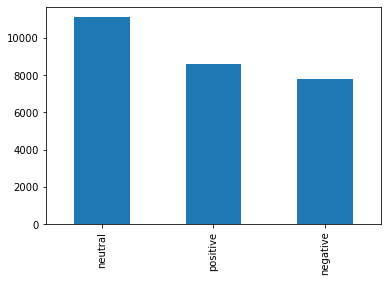

In [15]:
data['sentiment'].value_counts().plot.bar(ylim=0)

In [16]:
#Transform Categories to numeric
data['sentiment'] = data['sentiment'].replace({'neutral':0, 'positive':1, 'negative':2})

In [17]:
X = data['cleaned']
y = data['sentiment']

In [18]:
#Our text is allready tokenized and because NTLK vectorizer needs a tokenizer function we will create our own 
vectorizer = CountVectorizer(tokenizer=lambda text: text, lowercase=False)

X = vectorizer.fit_transform(X).toarray()
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [19]:
#split our data in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,stratify=list(y))

## Random Forest

In [22]:
clf=RandomForestClassifier(n_jobs=-1)
clf.fit(X_train, y_train)
print('RandomForestClassifier :')

y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))

RandomForestClassifier :
              precision    recall  f1-score   support

           0       0.54      0.73      0.62      1112
           1       0.71      0.59      0.64       859
           2       0.63      0.44      0.52       778

    accuracy                           0.60      2749
   macro avg       0.63      0.59      0.60      2749
weighted avg       0.62      0.60      0.60      2749



## Νaive Βayes

In [23]:
clf=naive_bayes.MultinomialNB()
clf.fit(X_train, y_train)
print('Νaive_ΒayesClassifier :')

y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))

Νaive_ΒayesClassifier :
              precision    recall  f1-score   support

           0       0.51      0.79      0.62      1112
           1       0.68      0.49      0.57       859
           2       0.69      0.35      0.47       778

    accuracy                           0.57      2749
   macro avg       0.62      0.54      0.55      2749
weighted avg       0.61      0.57      0.56      2749

